# Point 1:
Find solutions for the scale factor a(t) using the cosmological parameters of the baseline cosmology, use it to express the Hubble factor H as function of t.

## Cases.

### Single component.

1. Matter:
$$ a(t) = (\frac{t}{t_0})^{2/3} $$

where $t_0$ is the age of the universe, namely $t_0 = \frac{2}{3H_0}$.

2. Radiation:
$$ a(t) = (\frac{t}{t_0})^{1/2} $$
with $t_0 = \frac{1}{2H_0}$.

3. Lambda:
$$ a(t) = e^{H_0(t-t_0)} $$

### General form:

$$\frac{H^2}{H_o^2} = \frac{\dot{a}^2}{a^2H_0^2} = \frac{\Omega_{r, 0}}{a^4} + \frac{\Omega_{m, 0}}{a^3} + \Omega_{\Lambda, 0} + \frac{1-\Omega_0}{a^2}$$

The benchmark model has $\Omega_0 = 1$, then we have:

$$\implies \dot{a} = H_0\sqrt{\frac{\Omega_{r, 0}}{a^2} + \frac{\Omega_{m, 0}}{a} + \Omega_{\Lambda, 0}a^2}$$

In [1]:
# Import the necessary packages

import numpy as np  # Package for scientific computing with Python
import matplotlib.pyplot as plt  # Package for plotting
import pandas as pd  # Package for data analysis
import seaborn as sns  # Package for plotting styles

sns.set_theme()

In [5]:
# Cosmological parameters from Planck 2015 results

H_0 = 67.36 # Units: km/s/Mpc
Omega_m = 0.3111
Omega_l = 0.6889
Omega_r = 4.165e-5

In [6]:
def get_a_dot(a, omega_m = Omega_m, omega_l = Omega_l, omega_r = Omega_r):
    """
    Function to get the derivative of the expansion factor, considering the types of matter.

    INPUT:
        a: expansion factor
        radiation: if True, include radiation
        matter: if True, include matter
        dark: if True, include dark energy
    OUTPUT:
        a_dot: derivative of the expansion factor
    """
    a_m = omega_m/a
    a_r = omega_r/(a**2)
    a_l = omega_l*(a**2)

    a_dot = a_m + a_l + a_r

    if np.abs(a_m - a_l) < 0.0001 and a_m != 0 and a_l != 0:
        print('Matter and dark matter equality at a = ', a)
    if np.abs(a_m - a_r) < 0.0001 and a_m != 0 and a_r != 0:
        print('Matter and radiation equality at a = ', a)
    if np.abs(a_l - a_r) < 0.0001 and a_l != 0 and a_r != 0:
        print('Dark matter and radiation equality at a = ', a)

    if a_dot <0:
        print('Negative derivative at a = ', a)
        return 0
    a_dot = H_0 * np.sqrt(a_dot)

    return a_dot

In [7]:
def runge_kutta(f, y_0, t0 = 0, h = -0.001, omega_m = Omega_m, omega_l = Omega_l, omega_r = Omega_r):
    """
    Function to solve a system of differential equations using the Runge-Kutta method (order 4).

    INPUT:
        f: function to solve
        t0: initial time
        y_0: initial value
        h: step
    OUTPUT:
        t: time
        y: solution
    """
    y = [y_0]
    t = [t0]
    while True:
        k1 = f(y[-1], omega_m = omega_m, omega_l = omega_l, omega_r = omega_r)
        k2 = f(y[-1] + k1*h/2, omega_m = omega_m, omega_l = omega_l, omega_r = omega_r)
        k3 = f(y[-1] + k2*h/2, omega_m = omega_m, omega_l = omega_l, omega_r = omega_r)
        k4 = f(y[-1] + k3*h, omega_m = omega_m, omega_l = omega_l, omega_r = omega_r)

        y_aux = y[-1] + (k1 + 2*k2 + 2*k3 + k4)*h/6
        t_aux = t[-1] + h

        if len(y) > 100000:
            break
        if h < 0:
            if y_aux > 0:
                y.append(y_aux)
                t.append(t_aux)
            else:
                break
        else:
            if y_aux < 20:
                y.append(y_aux)
                t.append(t_aux)
            else:
                break

    return t, y

In [8]:
h = 0.001
t0 = 1

x_m, y_m = runge_kutta(f = get_a_dot, y_0 = 1, t0 = t0, h = h, omega_m = 1.0, omega_l = 0.0, omega_r = 0.0)
x_aux, y_aux = runge_kutta(f = get_a_dot, y_0 = 1, t0 =  t0, h = -0.0001, omega_m = 1.0, omega_l = 0.0, omega_r = 0.0)
x_m = x_aux[::-1] + x_m
y_m = y_aux[::-1] + y_m

x_r, y_r = runge_kutta(f = get_a_dot, y_0 = 1, t0 =  t0, h = h, omega_m = 0.0, omega_l = 0.0, omega_r = 1.0)
x_aux, y_aux = runge_kutta(f = get_a_dot, y_0 = 1, t0 =  t0, h = -0.0001, omega_m = 0.0, omega_l = 0.0, omega_r = 1.0)
x_r = x_aux[::-1] + x_r
y_r = y_aux[::-1] + y_r

x_l, y_l = runge_kutta(f = get_a_dot, y_0 = 1, t0 =  t0, h = h, omega_m = 0.0, omega_l = 1.0, omega_r = 0.0)
x_aux, y_aux = runge_kutta(f = get_a_dot, y_0 = 1, t0 = t0, h = -h, omega_m = 0.0, omega_l = 1.0, omega_r = 0.0)
x_l = x_aux[::-1] + x_l
y_l = y_aux[::-1] + y_l

/tmp/ipykernel_404/3739837336.py:14: RuntimeWarning: invalid value encountered in double_scalars
  a_r = omega_r/(a**2)


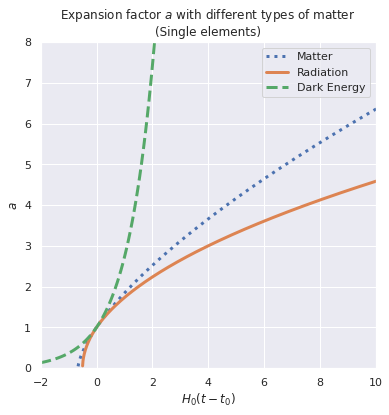

In [9]:
fig, ax = plt.subplots(figsize = (6, 6))

ax.plot((np.array(x_m)-t0)*H_0, y_m, label = 'Matter', linestyle = 'dotted', linewidth = 3)
ax.plot((np.array(x_r)-t0)*H_0, y_r, label = 'Radiation', linestyle = 'solid', linewidth = 3)
ax.plot((np.array(x_l)-t0)*H_0, y_l, label = 'Dark Energy', linestyle = 'dashed', linewidth = 3)

ax.set_ylim(0, 8)
ax.set_xlim(-2, 10)
ax.set_xlabel('$H_0(t-t_0)$')
ax.set_ylabel('$a$')
ax.set_title('Expansion factor $a$ with different types of matter\n(Single elements)')
plt.legend()
plt.show()

In [10]:
# Benchmark model
t0 = 0
x_b, y_b = runge_kutta(f = get_a_dot, y_0 = 1, t0 = t0, h = 0.000001)
x_aux, y_aux = runge_kutta(f = get_a_dot, y_0 = 1, t0 = t0, h = -0.000001)
x_b = x_aux[::-1] + x_b
y_b = y_aux[::-1] + y_b

Matter and dark matter equality at a =  0.7672580864193853
Matter and dark matter equality at a =  0.7672580864193724
Matter and dark matter equality at a =  0.7672277541124585
Matter and dark matter equality at a =  0.7672277544121735
Matter and dark matter equality at a =  0.7671974224049688
Matter and dark matter equality at a =  0.7671974224049559
Matter and dark matter equality at a =  0.7671670906974218
Matter and dark matter equality at a =  0.7671670909970421
Dark matter and radiation equality at a =  0.08853128621283807
Dark matter and radiation equality at a =  0.08853126372175402
Dark matter and radiation equality at a =  0.08846803202459261
Dark matter and radiation equality at a =  0.08846803202181577
Dark matter and radiation equality at a =  0.08840477780922461
Dark matter and radiation equality at a =  0.08840475525337317
Dark matter and radiation equality at a =  0.08834147846883544
Dark matter and radiation equality at a =  0.08834147846604498
Dark matter and radiatio

In [12]:
# Matter-Dark matter equality at 0.7672
idx_ml = np.where(np.abs(np.array(y_b) - 0.76725) < 0.0001)[0][0]
print(x_b[idx_ml], y_b[idx_ml])

# Radiation-Matter (acording to the book) at 2.9e-4
idx_rm = np.where(np.abs(np.array(y_b) - 2.9e-4) < 1)[0][0]
print(x_b[idx_rm], y_b[idx_rm])

-0.003658000000000161 0.7671974224049559
-0.014164999999996045 0.00013648425657562498


/tmp/ipykernel_404/2384531919.py:3: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.log((np.array(x_b)-min(x_b))*H_0), np.log(y_b), label = 'Benchmark', linestyle = 'solid', linewidth = 2, alpha = 0.8)


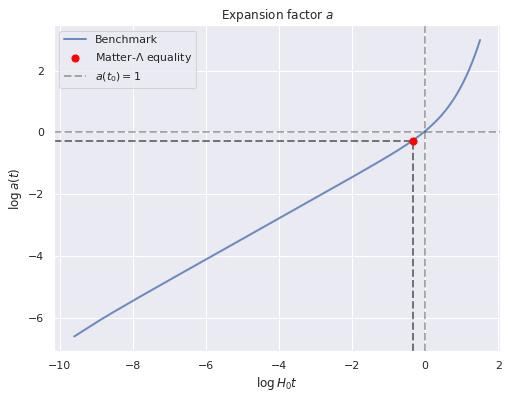

In [14]:
fig, ax = plt.subplots(figsize = (8, 6))

ax.plot(np.log((np.array(x_b)-min(x_b))*H_0), np.log(y_b), label = 'Benchmark', linestyle = 'solid', linewidth = 2, alpha = 0.8)

# Matter-Dark matter equality at 0.7672
x_ml = np.log((np.array(x_b[idx_ml])-min(x_b))*H_0)
y_ml = np.log(y_b[idx_ml])
ax.scatter(x_ml, y_ml, color = 'red', label = 'Matter-$\Lambda$ equality', marker = 'o', s = 50, zorder= 100)
ax.axhline(y = y_ml, color = 'black', linestyle = 'dashed', linewidth = 2, alpha = 0.5, xmin = 0, xmax = 0.8)
ax.axvline(x = x_ml, color = 'black', linestyle = 'dashed', linewidth = 2, alpha = 0.5, ymax = 0.64)

# Today
ax.axhline(y = 0, color = 'black', linestyle = 'dashed', alpha = 0.3, linewidth = 2)
ax.axvline(x = 0, color = 'black', linestyle = 'dashed', alpha = 0.3, linewidth = 2, label = '$a(t_0) = 1$')

ax.set_xlabel('$\log{H_0t}$')
ax.set_ylabel('$\log{a(t)}$')
ax.set_title('Expansion factor $a$')
plt.legend()
plt.show()

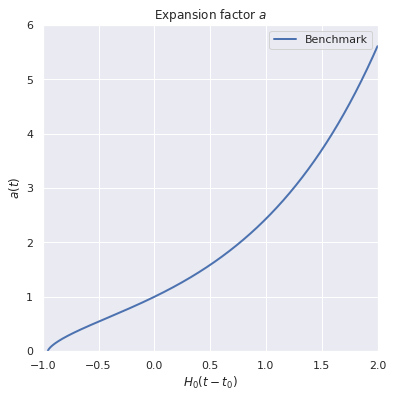

In [19]:
fig, ax = plt.subplots(figsize = (6, 6))

ax.plot((np.array(x_b)-t0)*H_0, y_b, label = 'Benchmark', linestyle = 'solid', linewidth = 2)

ax.set_xlabel('$H_0(t-t_0)$')
ax.set_ylabel('$a(t)$')
ax.set_ylim(0, 6)
ax.set_xlim(-1, 2)
ax.set_title('Expansion factor $a$')
plt.legend()
plt.show()